# Explotary Data Analysis

### Libraries

In [68]:
#%pip install ydata-profiling


In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from ydata_profiling import ProfileReport

## 1) Initial Data Exploration 

In [70]:
df = pd.read_csv('supermarket_sales.csv')

In [71]:
df.head()

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total     Date  \
0       Health and beauty       74.69       7.0  26.1415  548.9715   1/5/19   
1  Electronic accessories       15.28       5.0   3.8200   80.2200   3/8/19   
2      Home and lifestyle       46.33       7.0  16.2155  340.5255   3/3/19   
3       Health and beauty       58.22       8.0  23.2880  489.0480  1/27/19   
4       Sports and travel       86.31       7.0  30.2085  634.3785   2/8/19   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:29         Cash   76.40                 4.761905        3.8200     9.6  
2  13:23  Credit card  324.31                 4.761905       16.2155     7.4  
3  20:33      Ewallet  465.76                 4.761905       23.2880     8.4  
4  10:37      Ewallet  604.17                 4.761905       30.2085     5.3

In [72]:
df.tail()

Invoice ID Branch      City Customer type  Gender  \
998   347-56-2442      A    Yangon        Normal    Male   
999   849-09-3807      A    Yangon        Member  Female   
1000  849-09-3807      A    Yangon        Member  Female   
1001  745-74-0715      A    Yangon        Normal    Male   
1002  452-04-8808      B  Mandalay        Normal    Male   

                Product line  Unit price  Quantity  Tax 5%    Total     Date  \
998       Home and lifestyle       65.82       1.0   3.291   69.111  2/22/19   
999      Fashion accessories       88.34       7.0  30.919  649.299  2/18/19   
1000     Fashion accessories       88.34       7.0  30.919  649.299  2/18/19   
1001  Electronic accessories         NaN       2.0   5.803  121.863  3/10/19   
1002  Electronic accessories       87.08       NaN  30.478  640.038  1/26/19   

       Time  Payment    cogs  gross margin percentage  gross income  Rating  
998   15:33     Cash   65.82                 4.761905         3.291     4.1  
999   13:28     Cash  618.38                 4.761905        30.919     6.6  
1000  13:28     Cash  618.38                 4.761905        30.919     6.6  
1001  20:46  Ewallet  116.06                 4.761905         5.803     8.8  
1002  15:17     Cash  609.56                 4.761905        30.478     5.5

In [73]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [74]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                   float64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [75]:
df['Date']

0        1/5/19
1        3/8/19
2        3/3/19
3       1/27/19
4        2/8/19
         ...   
998     2/22/19
999     2/18/19
1000    2/18/19
1001    3/10/19
1002    1/26/19
Name: Date, Length: 1003, dtype: object

In [76]:
df['Date'] = pd.to_datetime(
    df['Date'],
    format='%m/%d/%y',
    errors='coerce'
)

In [77]:
df['Date'].head()

0   2019-01-05
1   2019-03-08
2   2019-03-03
3   2019-01-27
4   2019-02-08
Name: Date, dtype: datetime64[ns]

In [78]:
df.set_index('Date', inplace=True)

In [79]:
df.head()

Invoice ID Branch       City Customer type  Gender  \
Date                                                              
2019-01-05  750-67-8428      A     Yangon        Member  Female   
2019-03-08  226-31-3081      C  Naypyitaw        Normal  Female   
2019-03-03  631-41-3108      A     Yangon        Normal    Male   
2019-01-27  123-19-1176      A     Yangon        Member    Male   
2019-02-08  373-73-7910      A     Yangon        Normal    Male   

                      Product line  Unit price  Quantity   Tax 5%     Total  \
Date                                                                          
2019-01-05       Health and beauty       74.69       7.0  26.1415  548.9715   
2019-03-08  Electronic accessories       15.28       5.0   3.8200   80.2200   
2019-03-03      Home and lifestyle       46.33       7.0  16.2155  340.5255   
2019-01-27       Health and beauty       58.22       8.0  23.2880  489.0480   
2019-02-08       Sports and travel       86.31       7.0  30.2085  634.3785   

             Time      Payment    cogs  gross margin percentage  gross income  \
Date                                                                            
2019-01-05  13:08      Ewallet  522.83                 4.761905       26.1415   
2019-03-08  10:29         Cash   76.40                 4.761905        3.8200   
2019-03-03  13:23  Credit card  324.31                 4.761905       16.2155   
2019-01-27  20:33      Ewallet  465.76                 4.761905       23.2880   
2019-02-08  10:37      Ewallet  604.17                 4.761905       30.2085   

            Rating  
Date                
2019-01-05     9.1  
2019-03-08     9.6  
2019-03-03     7.4  
2019-01-27     8.4  
2019-02-08     5.3

In [80]:
df.describe()

Unit price    Quantity       Tax 5%        Total         cogs  \
count  996.000000  983.000000  1003.000000  1003.000000  1003.000000   
mean    55.764568    5.501526    15.400368   323.407726   308.007358   
std     26.510165    2.924673    11.715192   246.019028   234.303836   
min     10.080000    1.000000     0.508500    10.678500    10.170000   
25%     33.125000    3.000000     5.894750   123.789750   117.895000   
50%     55.420000    5.000000    12.096000   254.016000   241.920000   
75%     78.085000    8.000000    22.539500   473.329500   450.790000   
max     99.960000   10.000000    49.650000  1042.650000   993.000000   

       gross margin percentage  gross income       Rating  
count             1.003000e+03   1003.000000  1003.000000  
mean              4.761905e+00     15.400368     6.972682  
std               6.131488e-14     11.715192     1.717647  
min               4.761905e+00      0.508500     4.000000  
25%               4.761905e+00      5.894750     5.500000  
50%               4.761905e+00     12.096000     7.000000  
75%               4.761905e+00     22.539500     8.500000  
max               4.761905e+00     49.650000    10.000000

## 2) Univariate Analysis 
### Analyse one variable at a time

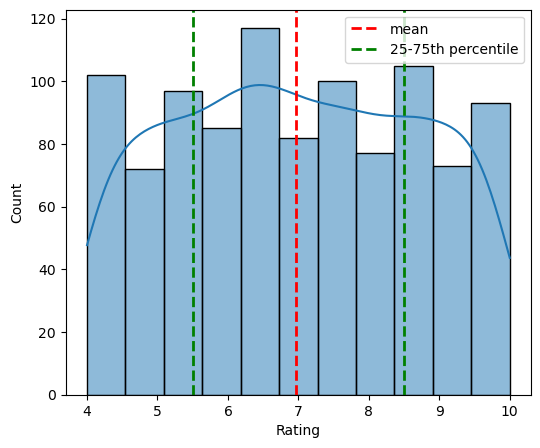

In [81]:
plt.figure(figsize=(6,5))
sns.histplot(df['Rating'], kde=True)
# sns.distplot(df['Rating'])
plt.axvline(np.mean(df['Rating']), c='red', ls='--', lw=2, label='mean')
plt.axvline(np.percentile(df['Rating'], 25), c='green', ls='--', lw=2, label='25-75th percentile')
plt.axvline(np.percentile(df['Rating'], 75), c='green', ls='--', lw=2)
plt.legend()

array([[<Axes: title={'center': 'Unit price'}>,
        <Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'Tax 5%'}>],
       [<Axes: title={'center': 'Total'}>,
        <Axes: title={'center': 'cogs'}>,
        <Axes: title={'center': 'gross margin percentage'}>],
       [<Axes: title={'center': 'gross income'}>,
        <Axes: title={'center': 'Rating'}>, <Axes: >]], dtype=object)

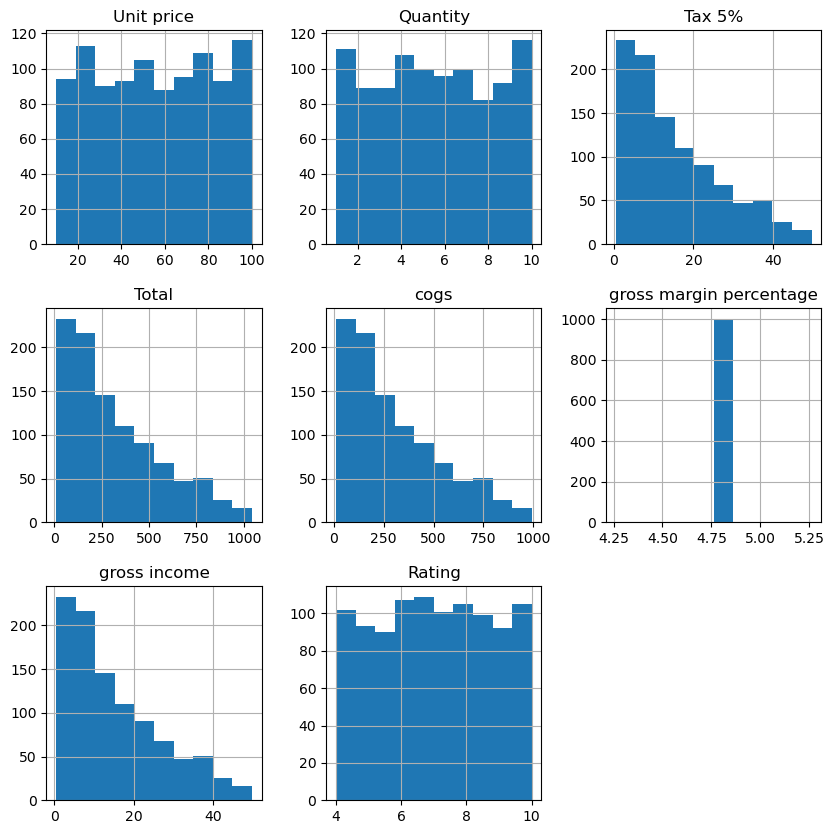

In [82]:
df.hist(figsize=(10,10))

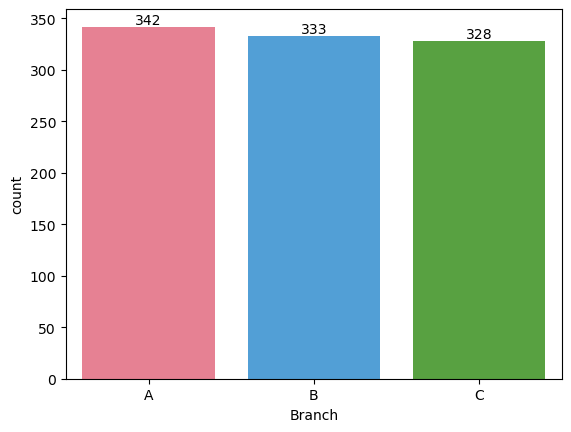

In [83]:
ax = sns.countplot(
    x='Branch',
    data=df,
    hue='Branch',
    palette='husl',
    legend=False,
    order=df['Branch'].value_counts().index 
)
for container in ax.containers:
    ax.bar_label(container)


In [84]:
df['Branch'].value_counts()

Branch
A    342
B    333
C    328
Name: count, dtype: int64

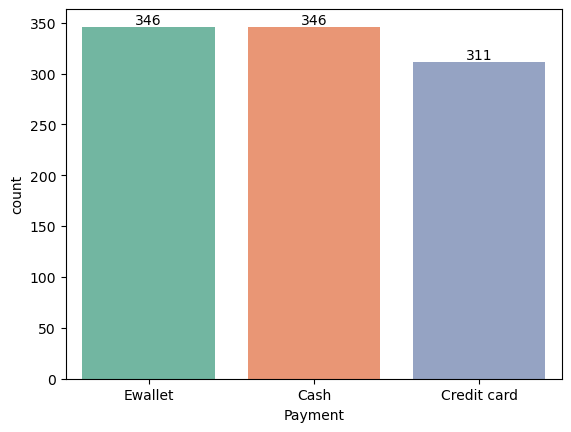

In [85]:
ax = sns.countplot(
    x='Payment',
    data=df,
    hue='Payment',
    palette='Set2',
    order=df['Payment'].value_counts().index
)
for container in ax.containers:
    ax.bar_label(container)

## 3) Bivariate Analysis
### Analyse two variable at a time

<Axes: xlabel='Rating', ylabel='gross income'>

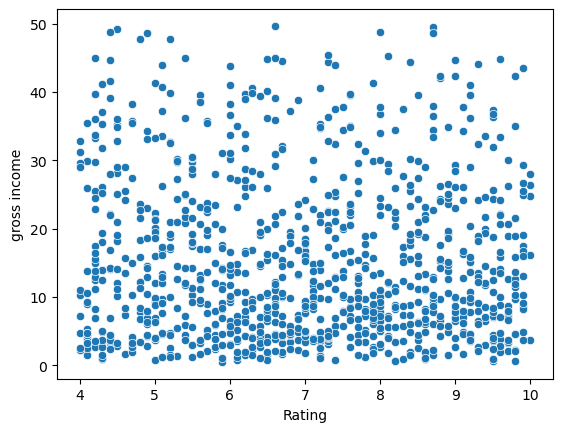

In [86]:
sns.scatterplot(x=df['Rating'], y=df['gross income'])

<Axes: xlabel='Rating', ylabel='gross income'>

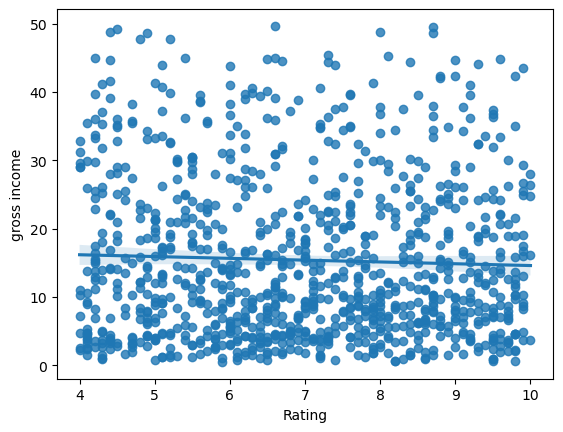

In [87]:
sns.regplot(x=df['Rating'], y=df['gross income'])

<Axes: xlabel='Branch', ylabel='gross income'>

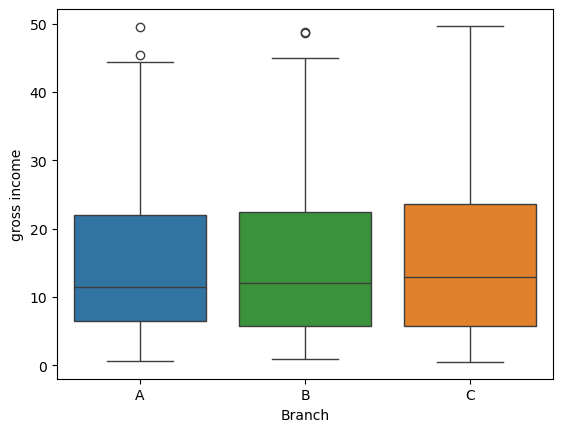

In [88]:
sns.boxplot(x='Branch',y='gross income',data=df, hue='Branch',
           order=df['Branch'].value_counts().index)

<Axes: xlabel='Gender', ylabel='gross income'>

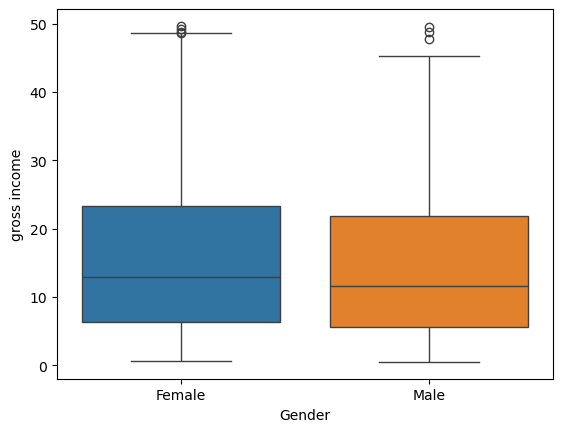

In [89]:
sns.boxplot(x='Gender', y='gross income',data=df, hue='Gender')

In [90]:
df.groupby(df.index).mean(numeric_only=True)

Unit price  Quantity     Tax 5%       Total        cogs  \
Date                                                                  
2019-01-01   54.995833  6.454545  18.830083  395.431750  376.601667   
2019-01-02   44.635000  6.000000  11.580375  243.187875  231.607500   
2019-01-03   59.457500  4.625000  12.369813  259.766062  247.396250   
2019-01-04   51.743333  5.333333  12.886417  270.614750  257.728333   
2019-01-05   61.636667  4.583333  14.034458  294.723625  280.689167   
...                ...       ...        ...         ...         ...   
2019-03-26   42.972308  4.000000   7.188692  150.962538  143.773846   
2019-03-27   56.841000  4.500000  13.822950  290.281950  276.459000   
2019-03-28   45.525000  4.800000  10.616200  222.940200  212.324000   
2019-03-29   66.346250  6.750000  23.947875  502.905375  478.957500   
2019-03-30   67.408182  5.888889  19.424500  407.914500  388.490000   

            gross margin percentage  gross income    Rating  
Date                                                         
2019-01-01                 4.761905     18.830083  6.583333  
2019-01-02                 4.761905     11.580375  6.050000  
2019-01-03                 4.761905     12.369813  8.112500  
2019-01-04                 4.761905     12.886417  6.516667  
2019-01-05                 4.761905     14.034458  7.433333  
...                             ...           ...       ...  
2019-03-26                 4.761905      7.188692  6.623077  
2019-03-27                 4.761905     13.822950  6.760000  
2019-03-28                 4.761905     10.616200  7.050000  
2019-03-29                 4.761905     23.947875  6.925000  
2019-03-30                 4.761905     19.424500  6.800000  

[89 rows x 8 columns]

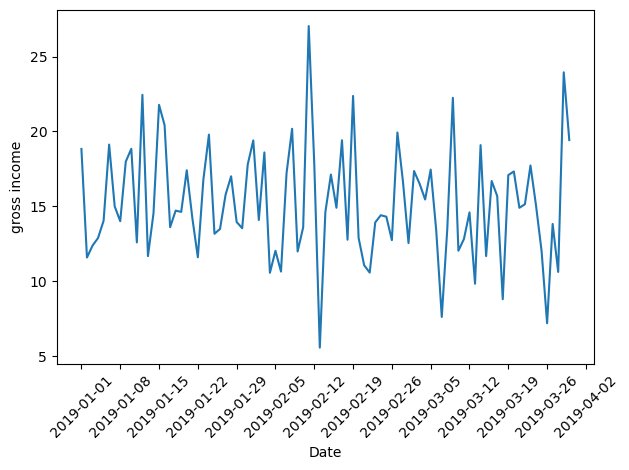

In [91]:
import matplotlib.dates as mdates

ax = sns.lineplot(
    x=df.groupby(df.index).mean(numeric_only=True).index,
    y=df.groupby(df.index).mean(numeric_only=True)['gross income']
)

ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))  # one tick per week
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


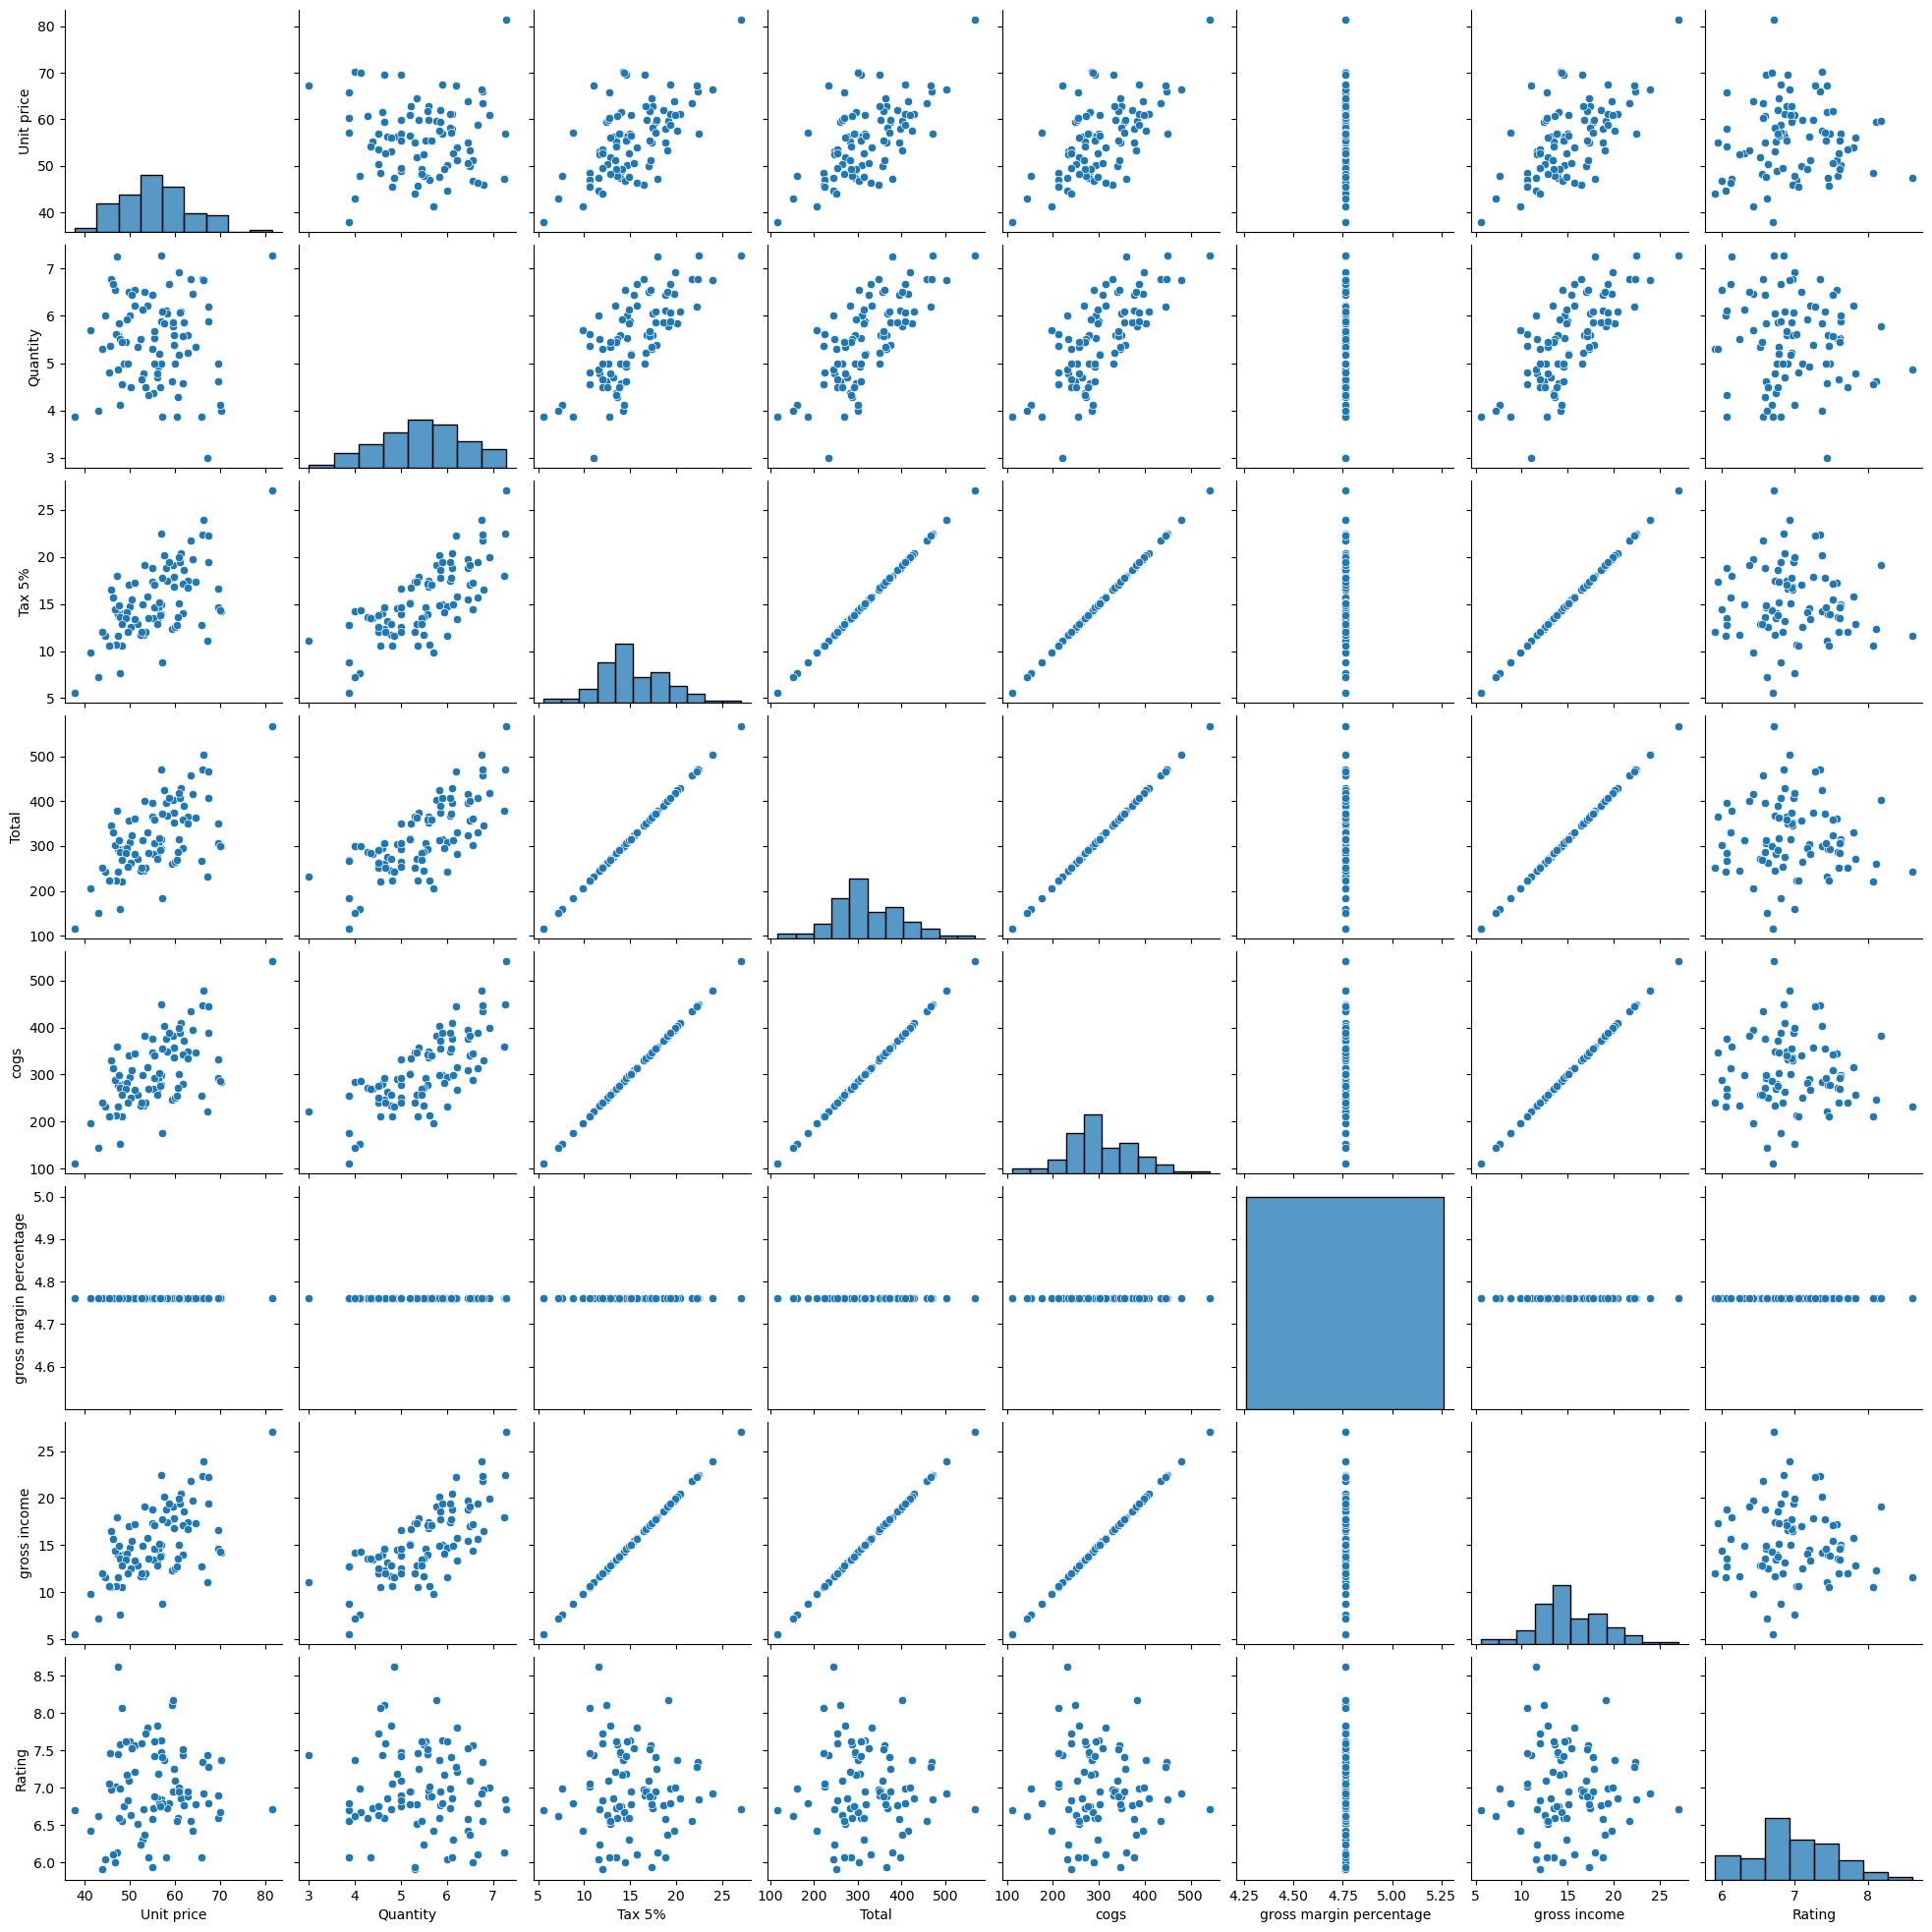

In [92]:
df_daily = df.groupby(df.index).mean(numeric_only=True)
sns.pairplot(df_daily)

## 4) Dealing with duplicate rows and missing values

In [93]:
df.duplicated()
# df.duplicated().sum()

Date
2019-01-05    False
2019-03-08    False
2019-03-03    False
2019-01-27    False
2019-02-08    False
              ...  
2019-02-22    False
2019-02-18    False
2019-02-18     True
2019-03-10     True
2019-01-26     True
Length: 1003, dtype: bool

In [94]:
df[df.duplicated()==True]

Invoice ID Branch      City Customer type  Gender  \
Date                                                             
2019-02-18  849-09-3807      A    Yangon        Member  Female   
2019-03-10  745-74-0715      A    Yangon        Normal    Male   
2019-01-26  452-04-8808      B  Mandalay        Normal    Male   

                      Product line  Unit price  Quantity  Tax 5%    Total  \
Date                                                                        
2019-02-18     Fashion accessories       88.34       7.0  30.919  649.299   
2019-03-10  Electronic accessories         NaN       2.0   5.803  121.863   
2019-01-26  Electronic accessories       87.08       NaN  30.478  640.038   

             Time  Payment    cogs  gross margin percentage  gross income  \
Date                                                                        
2019-02-18  13:28     Cash  618.38                 4.761905        30.919   
2019-03-10  20:46  Ewallet  116.06                 4.761905         5.803   
2019-01-26  15:17     Cash  609.56                 4.761905        30.478   

            Rating  
Date                
2019-02-18     6.6  
2019-03-10     8.8  
2019-01-26     5.5

In [95]:
df[df.duplicated(keep=False)].sort_values("Invoice ID")

Invoice ID Branch      City Customer type  Gender  \
Date                                                             
2019-01-26  452-04-8808      B  Mandalay        Normal    Male   
2019-01-26  452-04-8808      B  Mandalay        Normal    Male   
2019-03-10  745-74-0715      A    Yangon        Normal    Male   
2019-03-10  745-74-0715      A    Yangon        Normal    Male   
2019-02-18  849-09-3807      A    Yangon        Member  Female   
2019-02-18  849-09-3807      A    Yangon        Member  Female   

                      Product line  Unit price  Quantity  Tax 5%    Total  \
Date                                                                        
2019-01-26  Electronic accessories       87.08       NaN  30.478  640.038   
2019-01-26  Electronic accessories       87.08       NaN  30.478  640.038   
2019-03-10  Electronic accessories         NaN       2.0   5.803  121.863   
2019-03-10  Electronic accessories         NaN       2.0   5.803  121.863   
2019-02-18     Fashion accessories       88.34       7.0  30.919  649.299   
2019-02-18     Fashion accessories       88.34       7.0  30.919  649.299   

             Time  Payment    cogs  gross margin percentage  gross income  \
Date                                                                        
2019-01-26  15:17     Cash  609.56                 4.761905        30.478   
2019-01-26  15:17     Cash  609.56                 4.761905        30.478   
2019-03-10  20:46  Ewallet  116.06                 4.761905         5.803   
2019-03-10  20:46  Ewallet  116.06                 4.761905         5.803   
2019-02-18  13:28     Cash  618.38                 4.761905        30.919   
2019-02-18  13:28     Cash  618.38                 4.761905        30.919   

            Rating  
Date                
2019-01-26     5.5  
2019-01-26     5.5  
2019-03-10     8.8  
2019-03-10     8.8  
2019-02-18     6.6  
2019-02-18     6.6

In [96]:
df.drop_duplicates(inplace=True)

In [97]:
df.duplicated().sum()

np.int64(0)

In [98]:
df.isna().sum()

Invoice ID                  0
Branch                      0
City                        0
Customer type              79
Gender                      0
Product line               43
Unit price                  6
Quantity                   19
Tax 5%                      0
Total                       0
Time                        0
Payment                     0
cogs                        0
gross margin percentage     0
gross income                0
Rating                      0
dtype: int64

In [99]:
df.isna().sum()/len(df)

Invoice ID                 0.000
Branch                     0.000
City                       0.000
Customer type              0.079
Gender                     0.000
Product line               0.043
Unit price                 0.006
Quantity                   0.019
Tax 5%                     0.000
Total                      0.000
Time                       0.000
Payment                    0.000
cogs                       0.000
gross margin percentage    0.000
gross income               0.000
Rating                     0.000
dtype: float64

<Axes: ylabel='Date'>

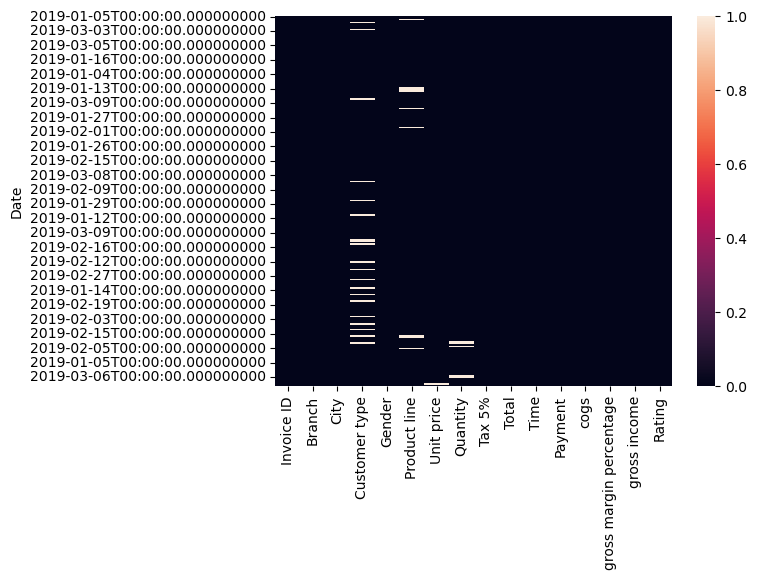

In [100]:
sns.heatmap(df.isnull())

In [101]:
# df.fillna(0)
df.fillna(df.mean(numeric_only=True), inplace=True)

<Axes: ylabel='Date'>

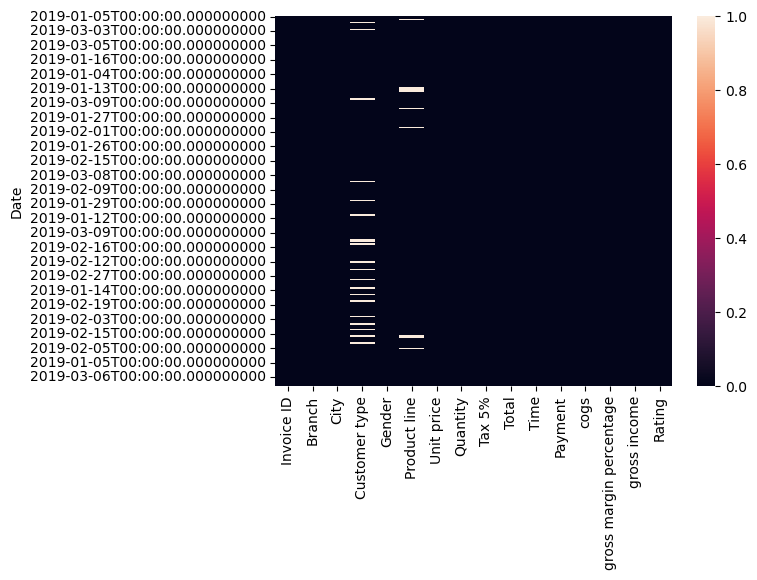

In [102]:
sns.heatmap(df.isnull())

In [103]:
# Numeric → mean
df[df.select_dtypes(include="number").columns] = df.select_dtypes(include="number").fillna(df.mean(numeric_only=True))

# Categorical → mode
df[df.select_dtypes(include="object").columns] = df.select_dtypes(include="object").fillna(df.mode().iloc[0])


<Axes: ylabel='Date'>

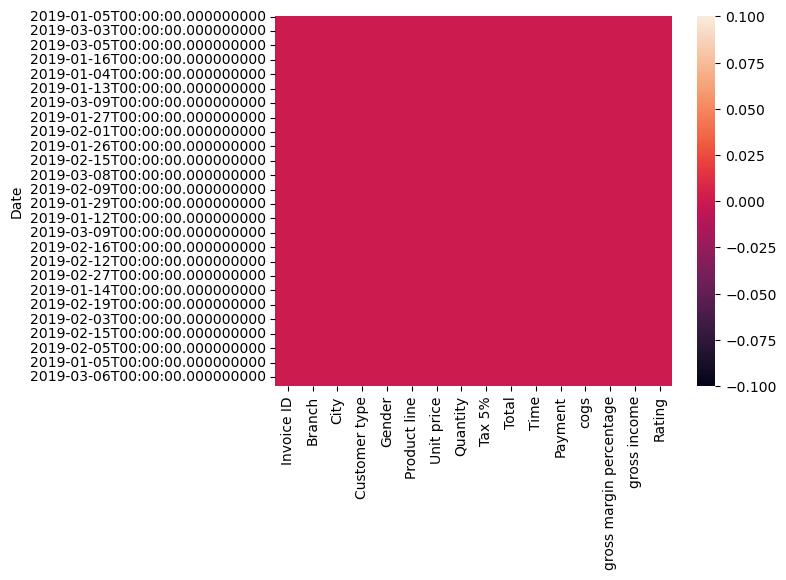

In [104]:
sns.heatmap(df.isnull())

In [105]:
dataset = pd.read_csv('supermarket_sales.csv')
prof = ProfileReport(dataset) ## Only recommended when dataset is small
prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████████████████████████████████████████| 17/17 [00:00<00:00, 241.27it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## 5) Correlation Analysis

In [106]:
np.corrcoef(df['gross income'], df['Rating'])

array([[ 1.       , -0.0364417],
       [-0.0364417,  1.       ]])

In [107]:
round(np.corrcoef(df['gross income'], df['Rating'])[0][1],4)

np.float64(-0.0364)

In [108]:
corr_matrix = df.corr(numeric_only=True).fillna(0)
corr_matrix

Unit price  Quantity    Tax 5%     Total      cogs  \
Unit price                 1.000000  0.014786  0.629034  0.629034  0.629034   
Quantity                   0.014786  1.000000  0.704067  0.704067  0.704067   
Tax 5%                     0.629034  0.704067  1.000000  1.000000  1.000000   
Total                      0.629034  0.704067  1.000000  1.000000  1.000000   
cogs                       0.629034  0.704067  1.000000  1.000000  1.000000   
gross margin percentage    0.000000  0.000000  0.000000  0.000000  0.000000   
gross income               0.629034  0.704067  1.000000  1.000000  1.000000   
Rating                    -0.006601 -0.021225 -0.036442 -0.036442 -0.036442   

                         gross margin percentage  gross income    Rating  
Unit price                                   0.0      0.629034 -0.006601  
Quantity                                     0.0      0.704067 -0.021225  
Tax 5%                                       0.0      1.000000 -0.036442  
Total                                        0.0      1.000000 -0.036442  
cogs                                         0.0      1.000000 -0.036442  
gross margin percentage                      0.0      0.000000  0.000000  
gross income                                 0.0      1.000000 -0.036442  
Rating                                       0.0     -0.036442  1.000000

<Axes: >

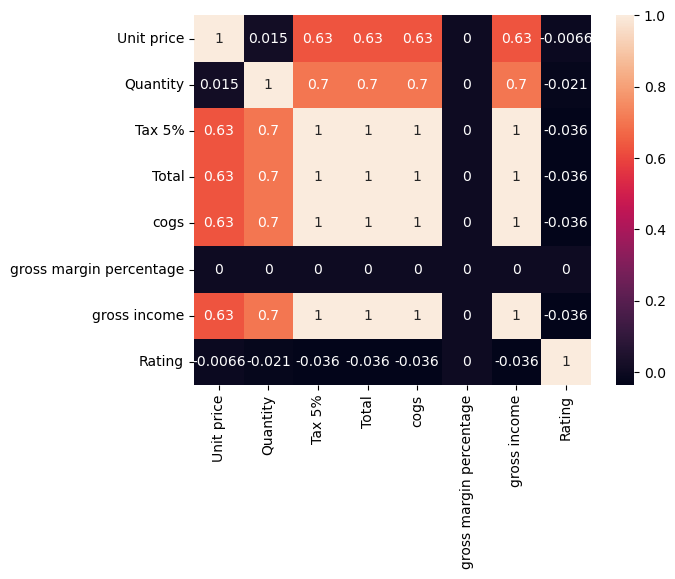

In [109]:
sns.heatmap(corr_matrix, annot=True)

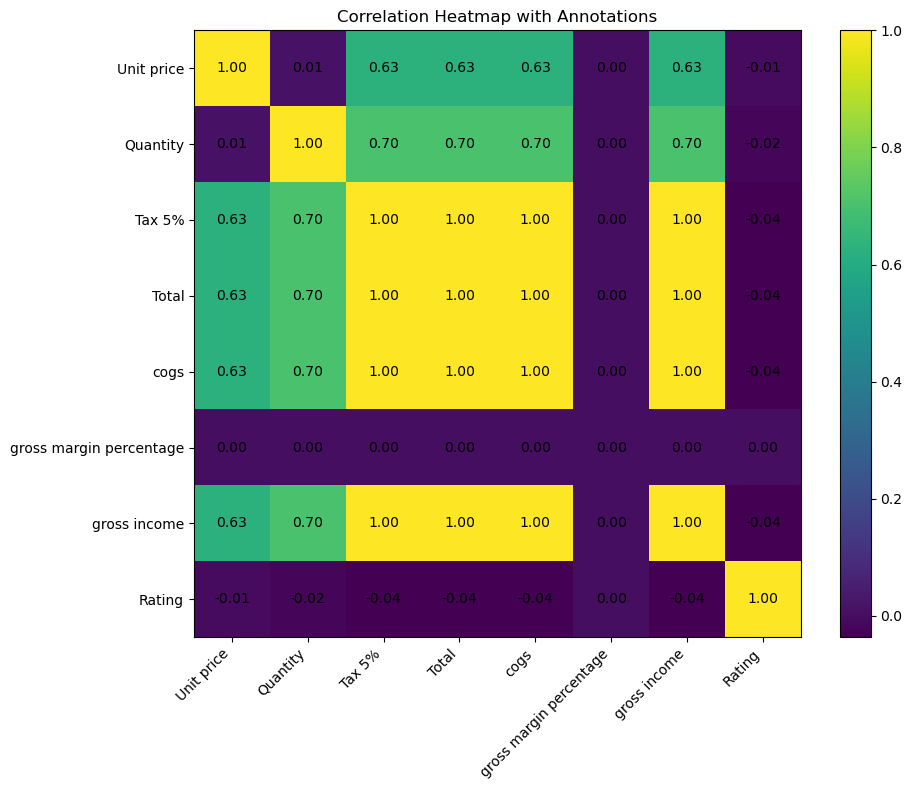

In [110]:
corr_matrix = df.corr(numeric_only=True).fillna(0)

plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix)
plt.colorbar()

plt.xticks(
    range(len(corr_matrix.columns)),
    corr_matrix.columns,
    rotation=45,
    ha="right"
)
plt.yticks(
    range(len(corr_matrix.columns)),
    corr_matrix.columns
)

# Add annotations (annot=True equivalent)
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        plt.text(
            j, i,
            f"{corr_matrix.iloc[i, j]:.2f}",
            ha="center",
            va="center",
            fontsize=10
        )

plt.title("Correlation Heatmap with Annotations")
plt.tight_layout()
plt.show()
